# Wine Classification

Myisha Chaudhry- 200591740

Kayleigh Habib - 200370580

Abigail Lee - 200469770


### Introduction

The purpose of this analysis is to determine how...

In [28]:
install.packages("corrplot")
install.packages("kernlab")
library(dplyr)
library(ggplot2)
library(corrplot)
library(tidyverse)
library(GGally)
library(caret) 
library(class)
library(randomForest)
library(tree)
library(kernlab)      
library(e1071)     

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



### Load and Describe Data

In [29]:
# Load the data
red <- read.csv("winequality-red.csv", sep = ";")
white <- read.csv("winequality-white.csv", sep = ";")

In [30]:
red$type <- as.factor("red")
#head(red)
white$type<- as.factor("white")
#head(white)

In [31]:
data <- rbind(red, white)%>% 
  select(quality, everything()) #set quality in first column
data

quality,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,type
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,red
5,7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,red
5,7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,red
6,11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,red
5,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,red
5,7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,red
5,7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,red
7,7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,red
7,7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,red


In [32]:
# Look at the makeup of the data
str(data)
#6497 rows of 13 variables and 1 target (quality)

'data.frame':	6497 obs. of  13 variables:
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ type                : Factor w/ 2 levels "red","white": 1 1 1 1 1 1 1 1 1 1 ...


In [33]:
# get current column names
colnames(data)
#rename columns
names(data) <- c('quality','fixAcid','volAcid','citAcid','resSugar','chlor','freeSO2','totSO2','density','pH','sulphate','alcohol','type')
#check new column names and for any missing values
summary(data)
#No NA

[1] "quality"              "fixed.acidity"        "volatile.acidity"    
 [4] "citric.acid"          "residual.sugar"       "chlorides"           
 [7] "free.sulfur.dioxide"  "total.sulfur.dioxide" "density"             
[10] "pH"                   "sulphates"            "alcohol"             
[13] "type"

    quality         fixAcid          volAcid          citAcid      
 Min.   :3.000   Min.   : 3.800   Min.   :0.0800   Min.   :0.0000  
 1st Qu.:5.000   1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500  
 Median :6.000   Median : 7.000   Median :0.2900   Median :0.3100  
 Mean   :5.818   Mean   : 7.215   Mean   :0.3397   Mean   :0.3186  
 3rd Qu.:6.000   3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900  
 Max.   :9.000   Max.   :15.900   Max.   :1.5800   Max.   :1.6600  
    resSugar          chlor            freeSO2           totSO2     
 Min.   : 0.600   Min.   :0.00900   Min.   :  1.00   Min.   :  6.0  
 1st Qu.: 1.800   1st Qu.:0.03800   1st Qu.: 17.00   1st Qu.: 77.0  
 Median : 3.000   Median :0.04700   Median : 29.00   Median :118.0  
 Mean   : 5.443   Mean   :0.05603   Mean   : 30.53   Mean   :115.7  
 3rd Qu.: 8.100   3rd Qu.:0.06500   3rd Qu.: 41.00   3rd Qu.:156.0  
 Max.   :65.800   Max.   :0.61100   Max.   :289.00   Max.   :440.0  
    density             pH           sulp

### Data manipulation

In [34]:
# make dummy variable (0 = red, 1 = white)

# group the quality of data into 3 groups
# high, medium and low
data %>% group_by(quality)%>%summarise(count = n())

wine_data<- data %>%
    mutate(type = ifelse(type == "red", 1,0),
          quality = case_when(quality >= 6 ~ "high",
                              TRUE ~ "low"),
          quality = factor(quality, levels = c("high", "low")))
  
head(wine_data)
levels(wine_data$quality)

quality,count
<int>,<int>
3,30
4,216
5,2138
6,2836
7,1079
8,193
9,5


,quality,fixAcid,volAcid,citAcid,resSugar,chlor,freeSO2,totSO2,density,pH,sulphate,alcohol,type
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,low,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1
2,low,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1
3,low,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1
4,high,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
5,low,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1
6,low,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,1


[1] "high" "low"

### Exploratory Data Analysis

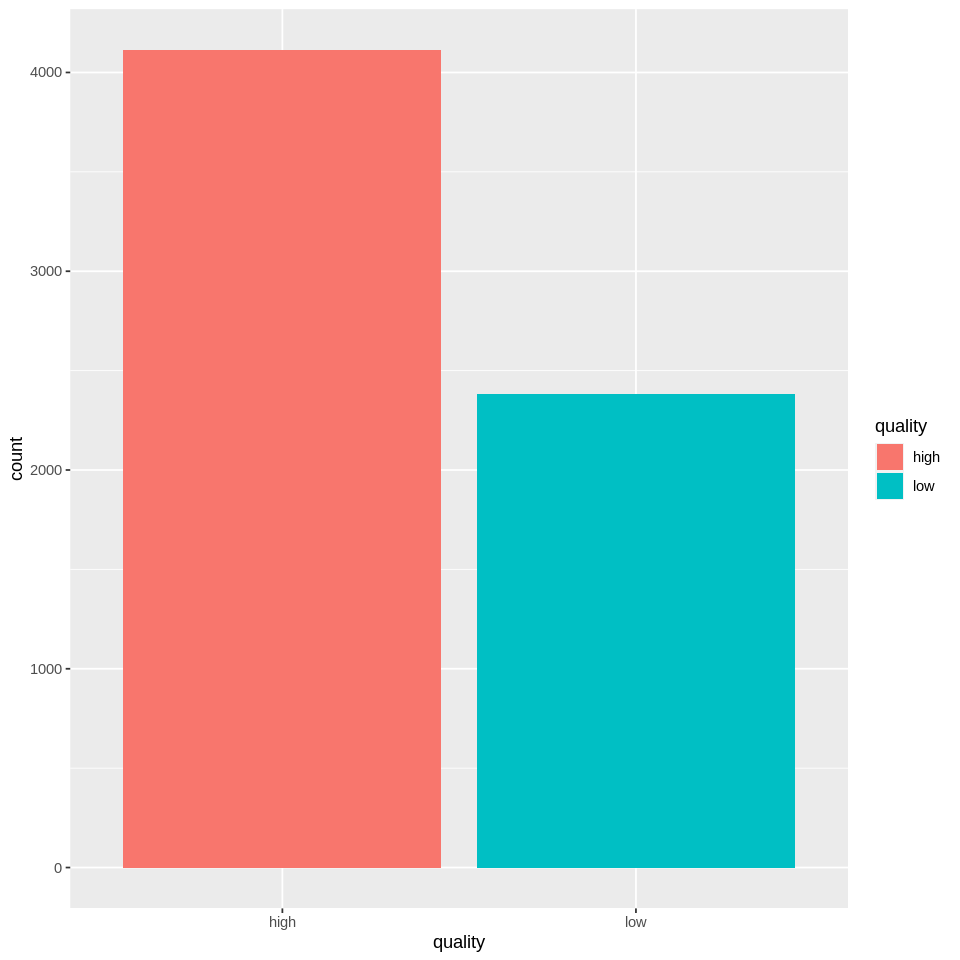

In [35]:
#distribution of target variable
wine_data %>% ggplot(aes(x=quality, fill=quality))+
  geom_bar(aes(y = after_stat(count)))

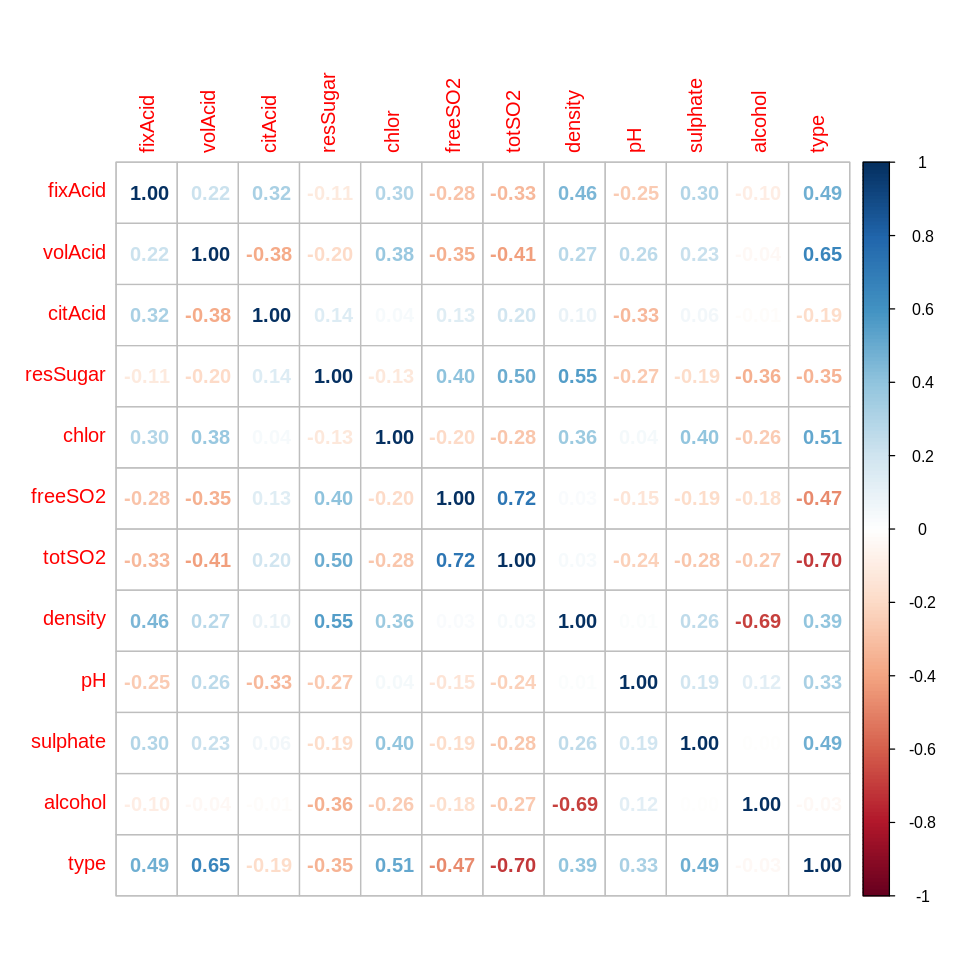

In [36]:
#Check correlation
n <- cor(wine_data %>% select(-quality),use = "complete.obs")
corrplot(n, method = "number")

In [37]:
#remove freeSO2 since correlated with totSO2
wine_data <- wine_data %>% 
  select(-freeSO2)

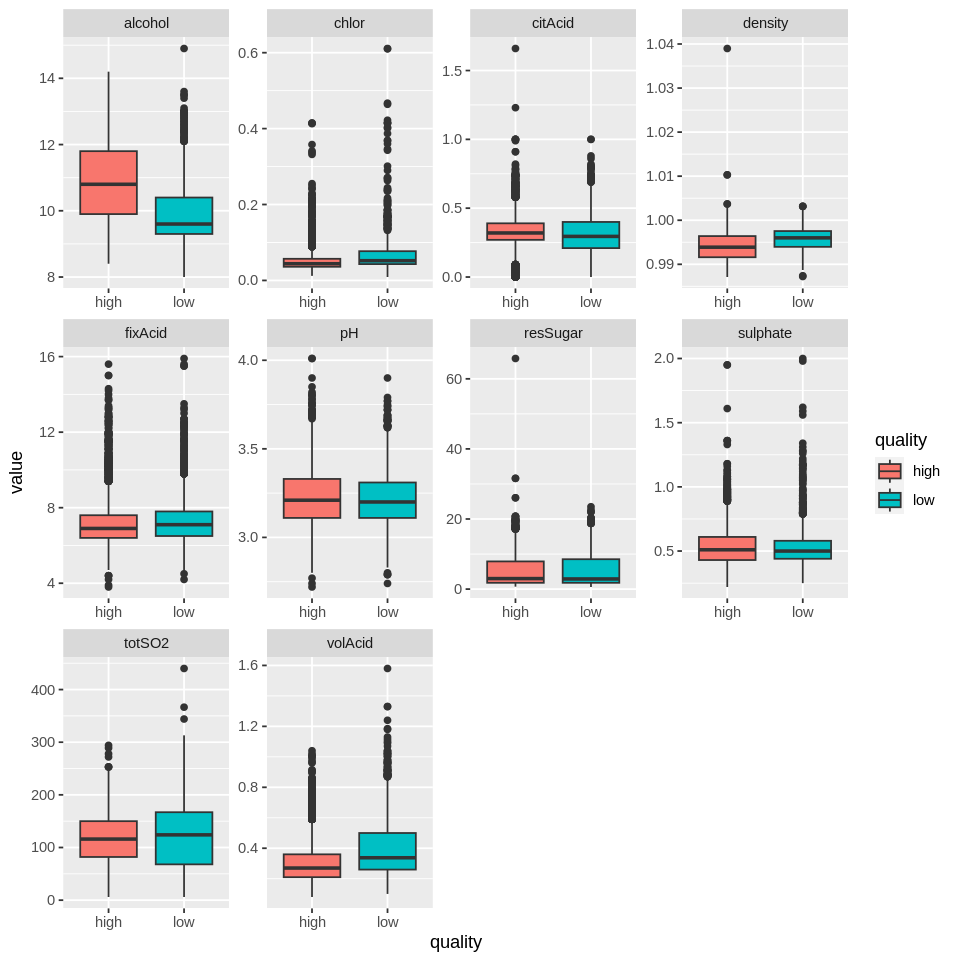

In [38]:
df_long <- wine_data %>% 
  pivot_longer(cols = fixAcid:alcohol, names_to = 'variable', values_to = 'value')

g <- ggplot(data = df_long, aes(x = quality, y = value, fill= quality)) +
  geom_boxplot() +
  facet_wrap(facets = ~variable, scales = 'free')
print(g)

In [39]:
#remove pH, resSugar since not materially related to quality
wine_data <- wine_data %>% 
  select(-pH, - resSugar)

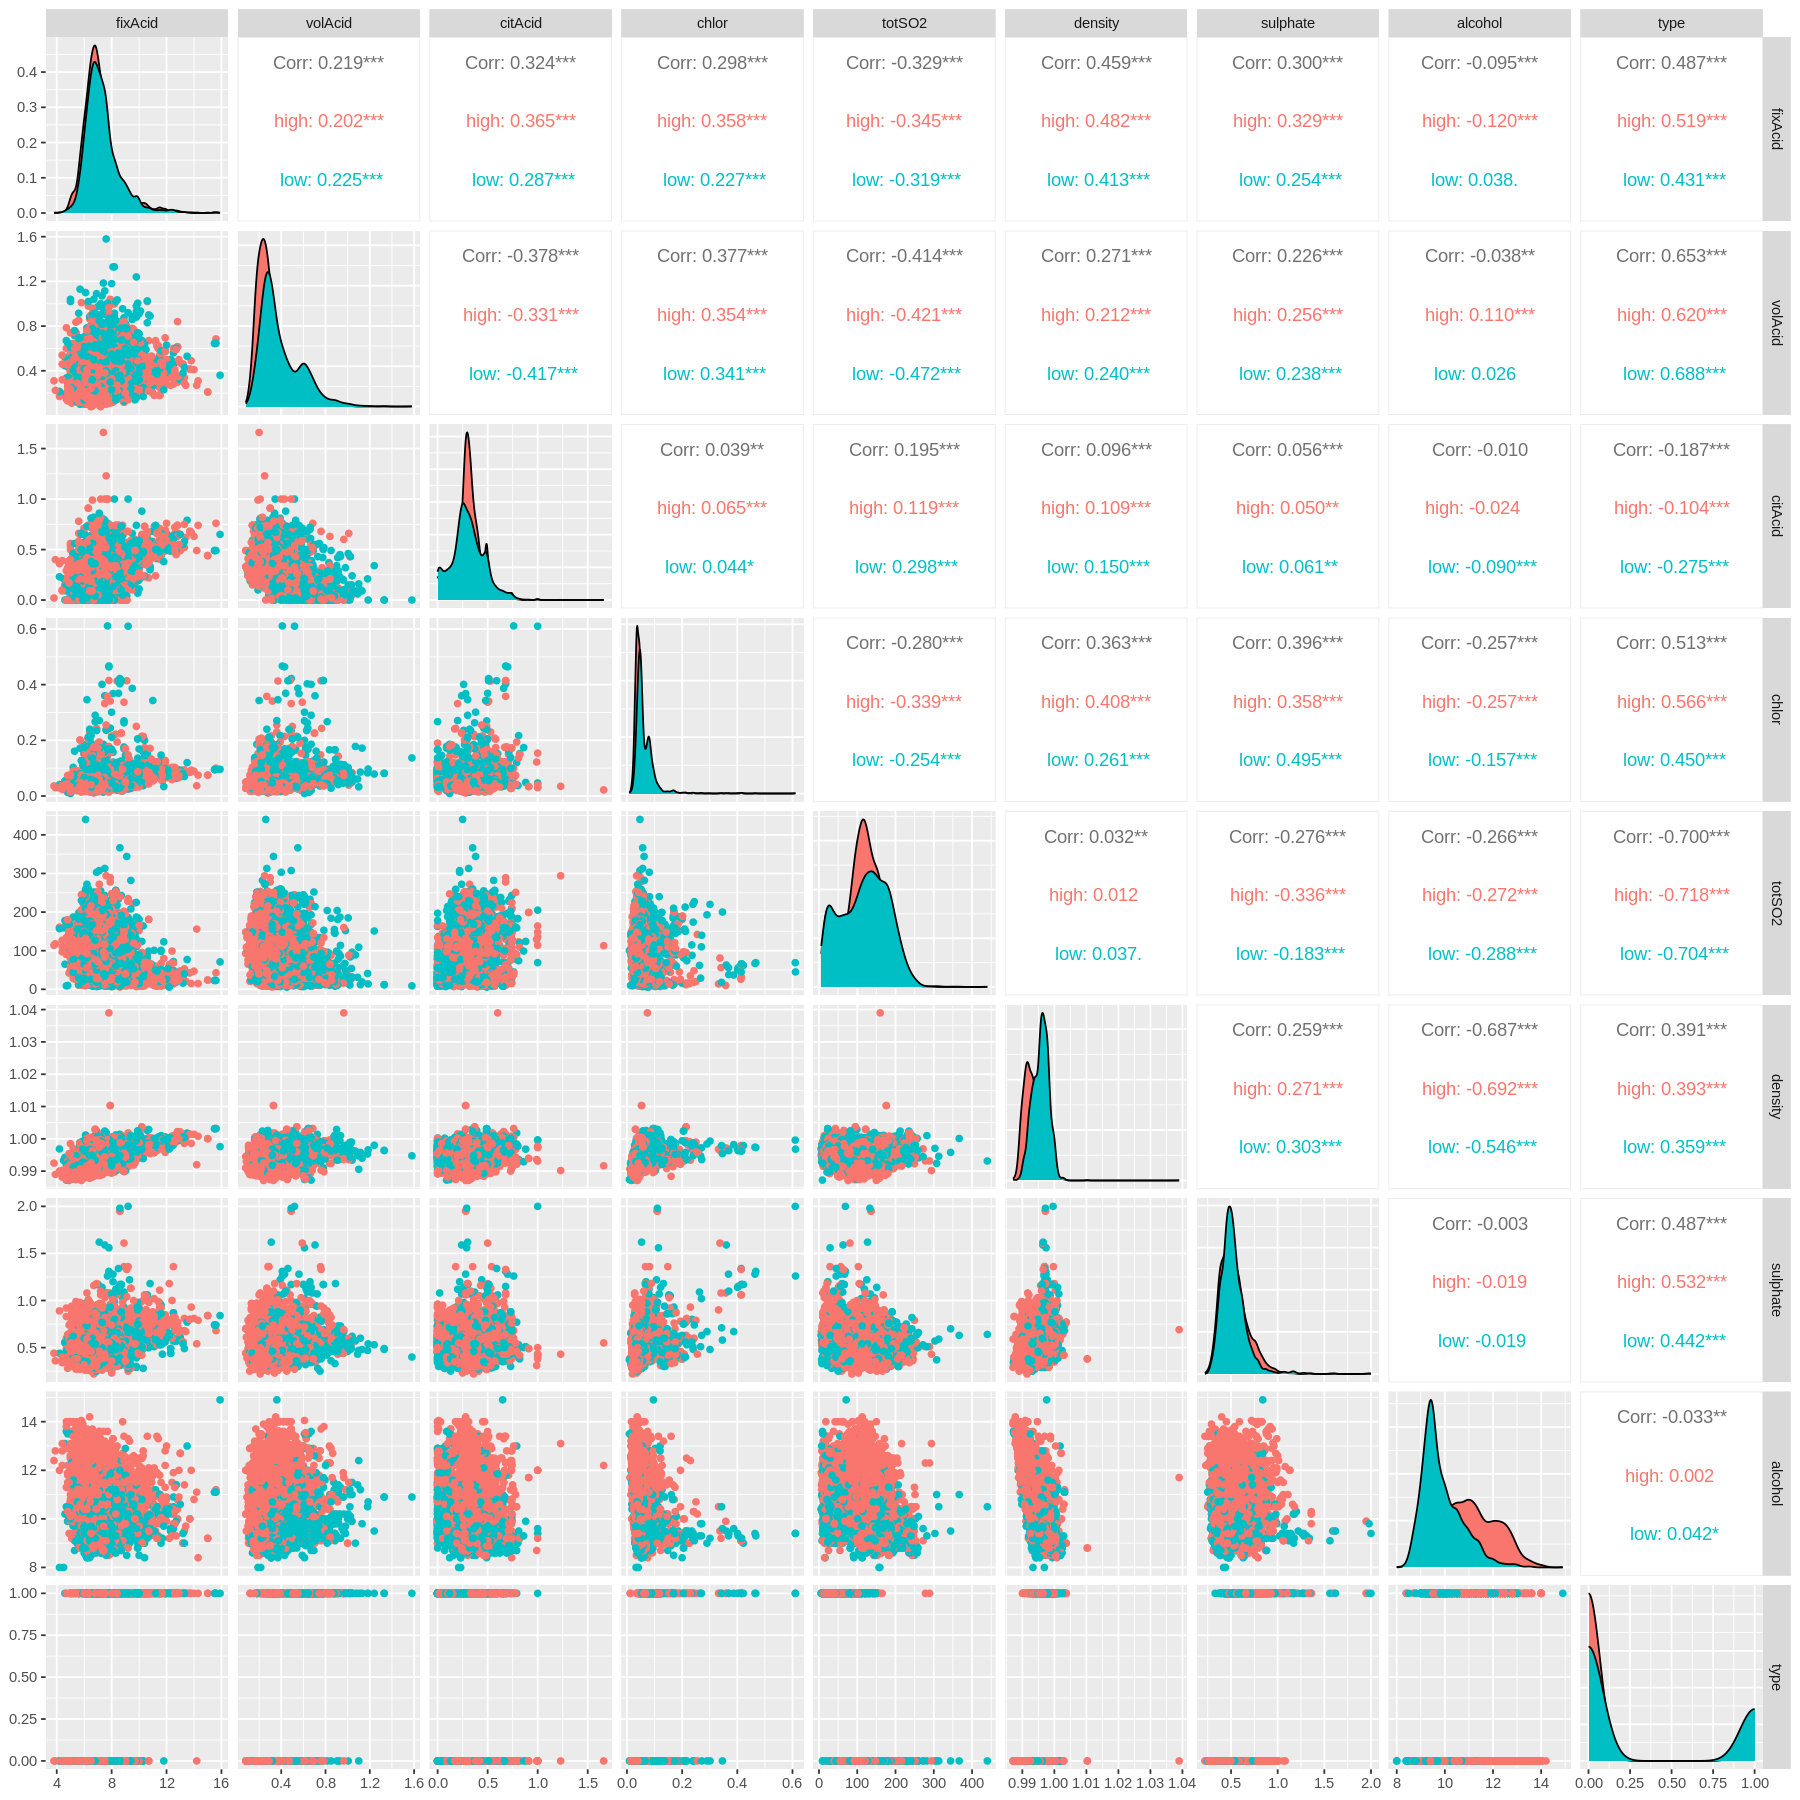

In [40]:
options(repr.plot.width=15, repr.plot.height=15)
ggpairs(data = wine_data, 
        columns = 2:ncol(wine_data), 
        mapping = aes(color = quality))

In [41]:
# scale the data
wine_data_scaled <-  wine_data %>%
  mutate(across(where(is.numeric), scale))

In [42]:
# PCA

# wine_pca <- model.matrix(quality ~ ., data = wine_data_scaled)[,-1]
# pca_total <- princomp(wine_pca)
# pca_total

# # To get the loadings (see how much each comp is made up of variables) 
# # and the scores (converts each component into value)
# unclass(pca_total$loadings)
# pca_total$scores 
# summary(pca_total)
# #Can probably use first 8 principal components which explain >95% of variation
# # OR could use first 7 prinicipal components which explain >90% of variation

In [43]:
# print("Information for low:")
# wine_quality_low <- wine_data_scaled %>%
#             filter(quality == "low")
# low_pca <- princomp(model.matrix(quality ~ ., 
#                                  data = wine_quality_low)[,-1])
# summary(low_pca)
# #unclass(low_pca$loading)

# print("Information for high:")
# wine_quality_high<- wine_data_scaled %>%
#             filter(quality == "high")
# high_pca <- princomp(model.matrix(quality ~ ., 
#                                   data = wine_quality_high)[,-1])
# summary(high_pca)
# #unclass(high_pca$loading)

## Model Building

### Split Data into Train and Test

In [44]:
set.seed(0)
#use scaled data
wine_data_scaled <-  wine_data %>%
  mutate(across(where(is.numeric), scale))


#use 80% of dataset as training set and 30% as test set
sample <- sample(c(TRUE, FALSE), nrow(wine_data_scaled), replace=TRUE, prob=c(0.8,0.2))
train  <- wine_data_scaled[sample, ]
train
test   <- wine_data_scaled[!sample, ]

dim(train)
dim(test)

#IF USING PCA DATA, NEED TO CHANGE TO USE 
#wine_data_pca <- as.data.frame(pca_total$scores)
#wine_data_pca$quality <- wine_data_scaled$quality 
#THEN DO THE SPLITTING

,quality,fixAcid,volAcid,citAcid,chlor,totSO2,density,sulphate,alcohol,type
,<fct>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
2,low,0.45100101,3.2819823,-2.1926638,1.1978825,-0.86240225,0.7014323,0.999501691,-0.580023490,1.750055
3,low,0.45100101,2.5531038,-1.9174051,1.0266184,-1.09240178,0.7681285,0.797896746,-0.580023490,1.750055
4,high,3.07358005,-0.3624106,1.6609574,0.5413699,-0.98624815,1.1016093,0.327485207,-0.580023490,1.750055
6,low,0.14246230,1.9457049,-2.1926638,0.5413699,-1.34009358,1.0349132,0.193081910,-0.915393709,1.750055
9,high,0.45100101,1.4597859,-2.0550344,0.4842819,-1.72932356,0.7014323,0.260283559,-0.831551154,1.750055
10,low,0.21959698,0.9738668,0.2846641,0.4271938,-0.24317274,1.0349132,1.805921472,0.006874393,1.750055
11,low,-0.39748044,1.4597859,-1.6421464,1.1693385,-0.89778679,0.4012996,0.058678613,-1.083078818,1.750055
12,low,0.21959698,0.9738668,0.2846641,0.4271938,-0.24317274,1.0349132,1.805921472,0.006874393,1.750055
13,low,-1.24596190,1.6723755,-2.1926638,0.9409863,-1.00394042,-0.1322698,-0.075724683,-0.496180935,1.750055


[1] 5142   10

[1] 1355   10

In [45]:
tr<- trainControl(method = "repeatedcv", number = 10, repeats = 3)
# modelTrain<- function(modelMethod, paramGrid){
#     set.seed(0)
#     model_fit<- train(factor(quality)~.,
#                      data = train,
#                      method = modelMethod,
#                      tuneGrid = paramGrid,
#                      #preProcess = c("center", "scale"),
#                      trControl = tr)
#     return (model_fit)
# }

## Model 1: Logistic Regression

In [46]:
set.seed(0)
glmModel <- train(factor(quality)~., data=train, method="glm",
                  family="binomial", trControl=tr)
pred_lr <-predict(glmModel, newdata = test)
summary(glmModel)

cm_lr <- confusionMatrix(pred_lr,factor(test$quality))
# cm_lr

cm_lr$overall['Accuracy']
cm_lr$byClass['Specificity']
cm_lr$byClass['Sensitivity']


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7756  -0.8155  -0.4440   0.9220   2.6771  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.733541   0.035787 -20.498  < 2e-16 ***
fixAcid      0.155419   0.047498   3.272  0.00107 ** 
volAcid      0.860714   0.053986  15.943  < 2e-16 ***
citAcid      0.069779   0.042373   1.647  0.09961 .  
chlor        0.049111   0.040143   1.223  0.22118    
totSO2       0.152646   0.054113   2.821  0.00479 ** 
density     -0.435186   0.064284  -6.770 1.29e-11 ***
sulphate    -0.201619   0.041859  -4.817 1.46e-06 ***
alcohol     -1.322488   0.062800 -21.059  < 2e-16 ***
type        -0.007239   0.076447  -0.095  0.92456    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6774.0  on 5141  degrees of freedom
Residual deviance: 5328.6  on 5132  degrees of freedom
AIC: 5348.6

Number of Fisher

Accuracy 
0.7357934

Specificity 
  0.5516529

Sensitivity 
  0.8381171

## Model 3: K - Nearest Neighbours

In [47]:
set.seed(0)
tunegrid_knn <- data.frame(k = seq(2,30,by=2))
knnModel <- train(quality ~., data = train, method = "knn",
                 trControl= tr,
                 tuneGrid = tunegrid_knn)
pred_knn <-predict(knnModel, newdata = test)
knnModel

cm_knn <- confusionMatrix(pred_knn,factor(test$quality))
# cm_knn

cm_knn$overall['Accuracy']
cm_knn$byClass['Specificity']
cm_knn$byClass['Sensitivity']

k-Nearest Neighbors 

5142 samples
   9 predictor
   2 classes: 'high', 'low' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4628, 4627, 4628, 4628, 4628, 4628, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   2  0.7332433  0.4255460
   4  0.7430350  0.4399441
   6  0.7470538  0.4459485
   8  0.7473750  0.4450417
  10  0.7480904  0.4455687
  12  0.7537927  0.4560134
  14  0.7564508  0.4613601
  16  0.7500329  0.4473245
  18  0.7500327  0.4477268
  20  0.7518481  0.4508220
  22  0.7503552  0.4476073
  24  0.7516525  0.4492641
  26  0.7513282  0.4478853
  28  0.7496439  0.4432317
  30  0.7512653  0.4469828

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 14.

Accuracy 
0.7579336

Specificity 
  0.5847107

Sensitivity 
  0.8541906

## Model 2: Trees

In [ ]:
# decision trees, random forest, bagging


Classification tree:
tree(formula = factor(quality) ~ ., data = train)
Variables actually used in tree construction:
[1] "alcohol" "volAcid"
Number of terminal nodes:  5 
Residual mean deviance:  1.067 = 5482 / 5137 
Misclassification error rate: 0.2655 = 1365 / 5142 

[1] 1.037141

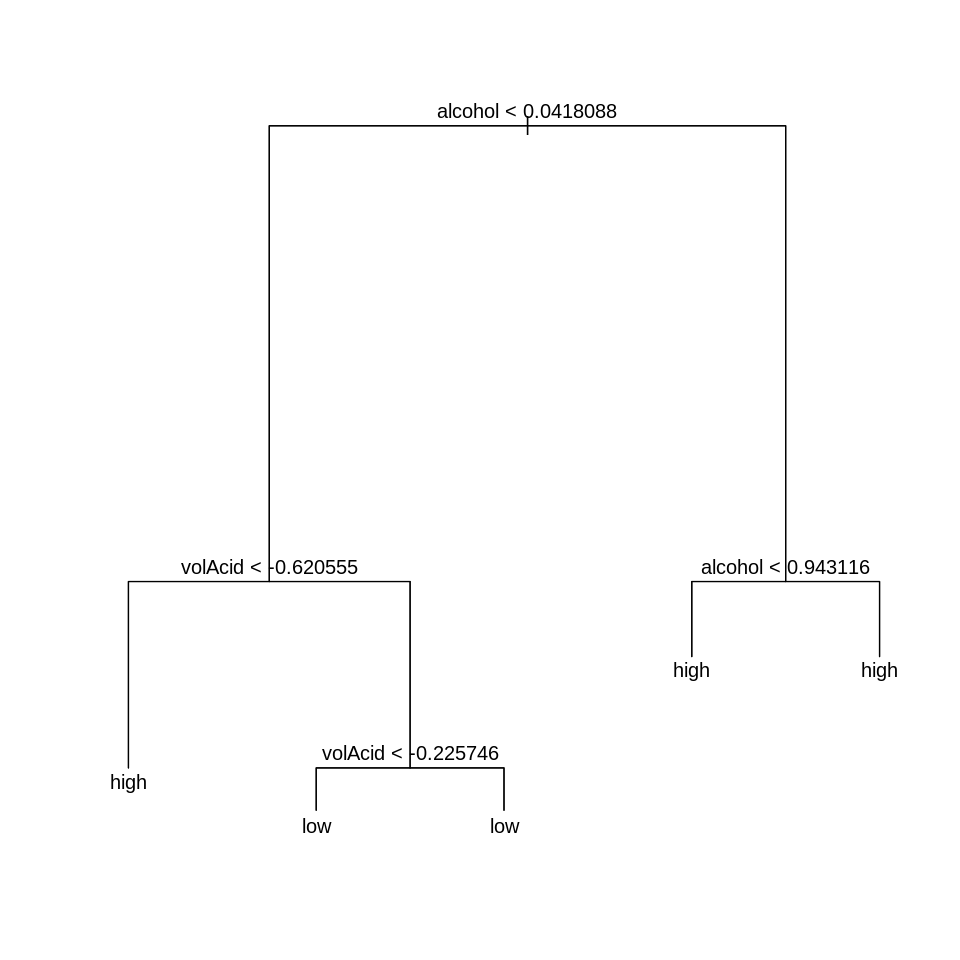

In [48]:
set.seed(0)
options(repr.plot.width=8, repr.plot.height=8)

tree.wine <- tree(factor(quality) ~ ., train)
#tree.wine <- rpart(quality ~ ., data = train, cp = 0)

plot(tree.wine)
text(tree.wine)

summary(tree.wine)

y_pred <- as.numeric(predict(tree.wine, newdata = test))
test_quality <- as.numeric(test$quality)
MSE <- mean((y_pred - test_quality)^2)
MSE

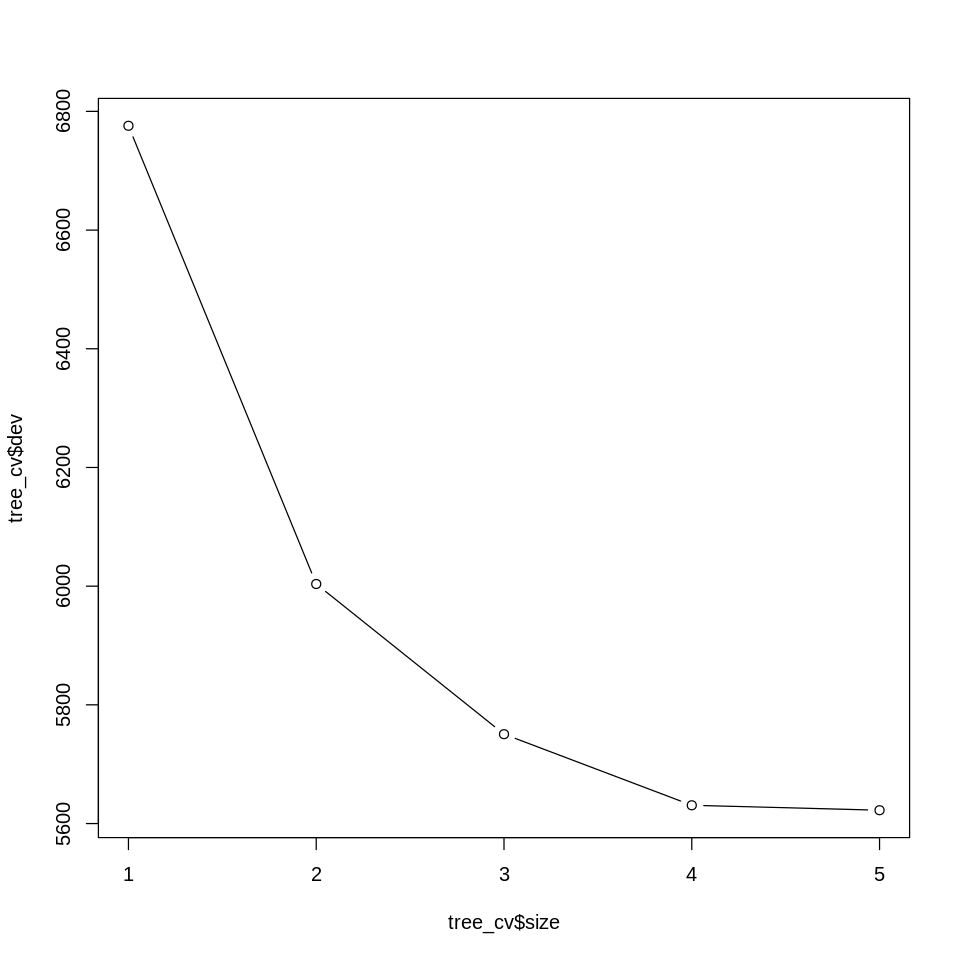

In [49]:
#use cross-validation to determine the optimal level of tree complexity
set.seed(0)

tree_cv <- cv.tree(tree.wine)

plot(tree_cv$size, tree_cv$dev, type = "b")

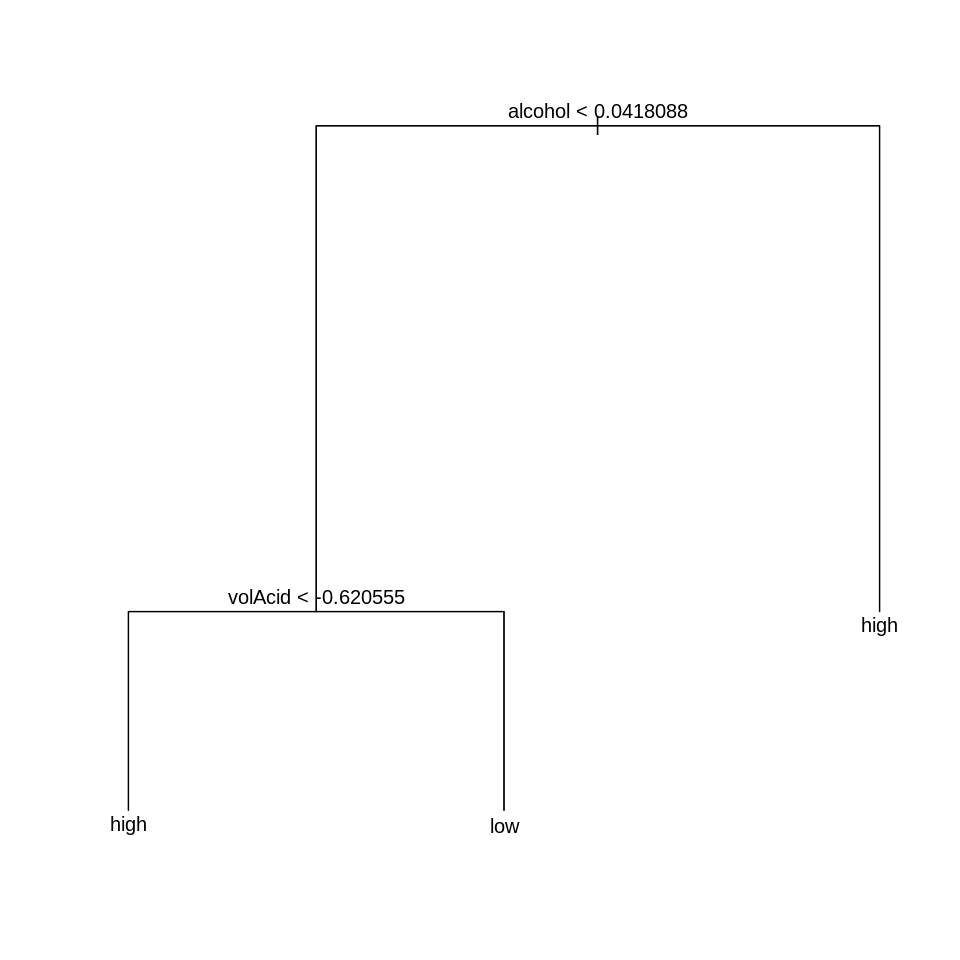

In [50]:
set.seed(0)

prune.wine <- prune.tree(tree.wine, best = 3)
plot(prune.wine)
text(prune.wine)

In [26]:
set.seed(0)

tunegrid_rf <- expand.grid(mtry = seq(1,10,by=1))

rf_model<- train(quality~. ,
                 data = train,
                 method = "rf", 
                 trControl = tr,
                 tuneGrid = tunegrid_rf)
rf_model

Random Forest 

5142 samples
   9 predictor
   2 classes: 'high', 'low' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 4628, 4627, 4628, 4628, 4628, 4628, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   1    0.7922975  0.5312157
   2    0.8188099  0.6027835
   3    0.8199761  0.6064794
   4    0.8183552  0.6032333
   5    0.8178370  0.6025708
   6    0.8160873  0.5988678
   7    0.8160875  0.5988848
   8    0.8156976  0.5984061
   9    0.8134939  0.5935290
  10    0.8140774  0.5947623

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 3.

In [52]:
pred_rf <-predict(rf_model, newdata = test)
cm_rf <- confusionMatrix(pred_rf,factor(test$quality))

cm_rf$overall['Accuracy']
cm_rf$byClass['Specificity']
cm_rf$byClass['Sensitivity']

Accuracy 
0.8162362

Specificity 
  0.6714876

Sensitivity 
  0.8966705

## Model 4: SVM

In [72]:
set.seed(0)
svm_mod_tune <- tune(svm, quality~., data=train, 
                     ranges=list(
                         kernel=c("linear","radial"),
                     cost = c(0.1,1,10),
                     gamma = c(0.5, 1, 2)))
svm_mod_tune


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 kernel cost gamma
 radial    1     1

- best performance: 0.2191817 


In [75]:
set.seed(0)
svmTuned <- svm(quality~., data = train, kernel="radial", cost = 1, gamma = 1)
svmTuned  

pred_svm <- predict(svmTuned, test)

cm_svm <- confusionMatrix(svm_predict, test$quality)
cm_svm

cm_svm$overall['Accuracy']
cm_svm$byClass['Specificity']
cm_svm$byClass['Sensitivity']


Call:
svm(formula = quality ~ ., data = train, kernel = "radial", cost = 1, 
    gamma = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  3434


Confusion Matrix and Statistics

          Reference
Prediction high low
      high  760 192
      low   111 292
                                          
               Accuracy : 0.7764          
                 95% CI : (0.7532, 0.7983)
    No Information Rate : 0.6428          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4942          
                                          
 Mcnemar's Test P-Value : 4.309e-06       
                                          
            Sensitivity : 0.8726          
            Specificity : 0.6033          
         Pos Pred Value : 0.7983          
         Neg Pred Value : 0.7246          
             Prevalence : 0.6428          
         Detection Rate : 0.5609          
   Detection Prevalence : 0.7026          
      Balanced Accuracy : 0.7379          
                                          
       'Positive' Class : high            
                           

Accuracy 
0.7763838

Specificity 
  0.6033058

Sensitivity 
  0.8725603

## Model Comparison

### Calculating Metrics

In [77]:
#lr
lr_TP <- 730
lr_TN <- 267
lr_FP <- 217
lr_FN <- 141

#KNN
knn_TP <- 744
knn_TN <- 283
knn_FP <- 201
knn_FN <- 127

#rf
rf_TP <- 781
rf_TN <- 333
rf_FP <- 151
rf_FN <- 90

#svm
svm_TP <- 760
svm_TN <- 292
svm_FP <- 192
svm_FN <- 111

### Formulas
FPR <- FP/(FP + TN)

FNR <- FN/(TP + FN)

In [80]:
#lr
lr_FPR <- lr_FP/(lr_FP + lr_TN)
lr_FNR <- lr_FN/(lr_TP + lr_FN)

#knn
knn_FPR <- knn_FP/(knn_FP + knn_TN)
knn_FNR <- knn_FN/(knn_TP + knn_FN)

#rf
rf_FPR <- rf_FP/(rf_FP + rf_TN)
rf_FNR <- rf_FN/(rf_TP + rf_FN)

#svm
svm_FPR <- svm_FP/(svm_FP + svm_TN)
svm_FNR <- svm_FN/(svm_TP + svm_FN)

In [81]:
acc_lr <- cm_lr$overall['Accuracy']
acc_knn <- cm_knn$overall['Accuracy']
acc_rf <- cm_rf$overall['Accuracy']
acc_svm <- cm_svm$overall['Accuracy']

In [82]:
spec_lr <- cm_lr$byClass['Specificity']
spec_knn <- cm_knn$byClass['Specificity']
spec_rf <- cm_rf$byClass['Specificity']
spec_svm <- cm_svm$byClass['Specificity']

In [83]:
sen_lr <- cm_lr$byClass['Sensitivity']
sen_knn <- cm_knn$byClass['Sensitivity']
sen_rf <- cm_rf$byClass['Sensitivity']
sen_svm <- cm_svm$byClass['Sensitivity']

In [84]:
prec_lr <- cm_lr$byClass['Precision']
prec_knn <- cm_knn$byClass['Precision']
prec_rf <- cm_rf$byClass['Precision']
prec_svm <- cm_svm$byClass['Precision']

In [85]:
model_names <- c("Logistic Regression", "KNN", "Random Forest", "SVM")
acc_values <- c(acc_lr, acc_knn, acc_rf, acc_svm)
spec_values <- c(spec_lr, spec_knn, spec_rf, spec_svm)
sen_values <- c(sen_lr, sen_knn, sen_rf, sen_svm)
prec_values <- c(prec_lr, prec_knn, prec_rf, prec_svm)
FPR_values <- c(lr_FPR, knn_FPR, rf_FPR, svm_FPR)
FNR_values <- c(lr_FNR, knn_FNR, rf_FNR, svm_FNR)

comp_table <- data.frame(model_names, acc_values, spec_values, sen_values, prec_values, FPR_values, FNR_values)
names(comp_table) <- c('Model', 'Accuracy', 'Specificity', 'Sensitivity', 'Precision', 'FPR', 'FNR')
comp_table

Model,Accuracy,Specificity,Sensitivity,Precision,FPR,FNR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Logistic Regression,0.7357934,0.5516529,0.8381171,0.7708553,0.4483471,0.1618829
KNN,0.7579336,0.5847107,0.8541906,0.7873016,0.4152893,0.1458094
Random Forest,0.8162362,0.6714876,0.8966705,0.8308511,0.3119835,0.1033295
SVM,0.7763838,0.6033058,0.8725603,0.7983193,0.3966942,0.1274397
